In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#read and clear one df at a time

In [5]:
df_assessments = pd.read_csv('assessments.csv')
df_assessments

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0
...,...,...,...,...,...,...
201,GGG,2014J,37443,CMA,229.0,0.0
202,GGG,2014J,37435,TMA,61.0,0.0
203,GGG,2014J,37436,TMA,124.0,0.0
204,GGG,2014J,37437,TMA,173.0,0.0


In [6]:
#checking data type 
type_assessments = df_assessments.dtypes
type_assessments

code_module           object
code_presentation     object
id_assessment          int64
assessment_type       object
date                 float64
weight               float64
dtype: object

In [7]:
#Descriptive statistics
df_assessments.describe()

,id_assessment,date,weight
count,206.000000,195.000000,206.000000
mean,26473.975728,145.005128,20.873786
std,10098.625521,76.001119,30.384224
min,1752.000000,12.000000,0.000000
25%,15023.250000,71.000000,0.000000
50%,25364.500000,152.000000,12.500000
75%,34891.750000,222.000000,24.250000
max,40088.000000,261.000000,100.000000


In [8]:
#find missing values
df_assessments.isna().sum()

code_module           0
code_presentation     0
id_assessment         0
assessment_type       0
date                 11
weight                0
dtype: int64

In [9]:
# display all the rows with missing date
df_assessments[df_assessments['date'].isna()]

,code_module,code_presentation,id_assessment,assessment_type,date,weight
5,AAA,2013J,1757,Exam,NaN,100.0
11,AAA,2014J,1763,Exam,NaN,100.0
23,BBB,2013B,14990,Exam,NaN,100.0
35,BBB,2013J,15002,Exam,NaN,100.0
47,BBB,2014B,15014,Exam,NaN,100.0
53,BBB,2014J,15025,Exam,NaN,100.0
62,CCC,2014B,24290,Exam,NaN,100.0
63,CCC,2014B,40087,Exam,NaN,100.0
72,CCC,2014J,24299,Exam,NaN,100.0
73,CCC,2014J,40088,Exam,NaN,100.0


In [194]:
# they are all exams! we can assume that exams always happen last so find the highest date for all the assessments
max_value = df_assessments['date'].max()
max_value

261.0

In [195]:
# replace all the NaN with max date
df_assessments['date'].fillna(max_value, inplace=True)

In [196]:
df_assessments.isna().sum()

code_module          0
code_presentation    0
id_assessment        0
assessment_type      0
date                 0
weight               0
dtype: int64

The interquartile range (IQR) is a measure of the spread of the middle 50% of the data. The IQR can be calculated as the difference between the 75th percentile and the 25th percentile of the dataset. Any data point outside the range of 1.5 times the IQR below the 25th percentile or above the 75th percentile can be considered an outlier.

To identify outliers using the IQR, we can use the quantile() function in pandas to calculate the 25th and 75th percentiles of the dataset. We can then calculate the IQR and use it to identify outliers.
In the above code, we calculate the 25th and 75th percentiles of column weight using quantile() and calculate the IQR. We then set a threshold of 1.5 to identify outliers and filter the DataFrame to obtain the outliers.

From https://saturncloud.io/blog/how-to-detect-and-exclude-outliers-in-a-pandas-dataframe/


In [14]:
# calculate IQR for column weight
# ovdje "outliersi" predstavljaju drugačiju vrstu ispita tj. završni ispit
Q1 = df_assessments['weight'].quantile(0.25)
Q3 = df_assessments['weight'].quantile(0.75)
IQR = Q3 - Q1

# identify outliers
threshold = 1.5
outliers = df_assessments[(df_assessments['weight'] < Q1 - threshold * IQR) | (df_assessments['weight'] > Q3 + threshold * IQR)]
outliers


,code_module,code_presentation,id_assessment,assessment_type,date,weight
5,AAA,2013J,1757,Exam,261.0,100.0
11,AAA,2014J,1763,Exam,261.0,100.0
23,BBB,2013B,14990,Exam,261.0,100.0
35,BBB,2013J,15002,Exam,261.0,100.0
47,BBB,2014B,15014,Exam,261.0,100.0
53,BBB,2014J,15025,Exam,261.0,100.0
62,CCC,2014B,24290,Exam,261.0,100.0
63,CCC,2014B,40087,Exam,261.0,100.0
72,CCC,2014J,24299,Exam,261.0,100.0
73,CCC,2014J,40088,Exam,261.0,100.0


In [15]:
df_courses = pd.read_csv('courses.csv')
df_courses

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240
5,BBB,2014B,234
6,CCC,2014J,269
7,CCC,2014B,241
8,DDD,2013J,261
9,DDD,2014J,262


In [16]:
type_courses = df_courses.dtypes
type_courses

code_module                   object
code_presentation             object
module_presentation_length     int64
dtype: object

In [17]:
print(df_courses.describe())

       module_presentation_length
count                   22.000000
mean                   255.545455
std                     13.654677
min                    234.000000
25%                    241.000000
50%                    261.500000
75%                    268.000000
max                    269.000000


In [18]:
print(df_courses.isna().sum())

code_module                   0
code_presentation             0
module_presentation_length    0
dtype: int64


In [19]:
df_studentAssessment = pd.read_csv('studentAssessment.csv')
df_studentAssessment

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0
...,...,...,...,...,...
173907,37443,527538,227,0,60.0
173908,37443,534672,229,0,100.0
173909,37443,546286,215,0,80.0
173910,37443,546724,230,0,100.0


In [20]:
type_studentAssessment = df_studentAssessment.dtypes
type_studentAssessment

id_assessment       int64
id_student          int64
date_submitted      int64
is_banked           int64
score             float64
dtype: object

In [21]:
print(df_studentAssessment.describe())

       id_assessment    id_student  date_submitted      is_banked  \
count  173912.000000  1.739120e+05   173912.000000  173912.000000   
mean    26553.803556  7.051507e+05      116.032942       0.010977   
std      8829.784254  5.523952e+05       71.484148       0.104194   
min      1752.000000  6.516000e+03      -11.000000       0.000000   
25%     15022.000000  5.044290e+05       51.000000       0.000000   
50%     25359.000000  5.852080e+05      116.000000       0.000000   
75%     34883.000000  6.344980e+05      173.000000       0.000000   
max     37443.000000  2.698588e+06      608.000000       1.000000   

               score  
count  173739.000000  
mean       75.799573  
std        18.798107  
min         0.000000  
25%        65.000000  
50%        80.000000  
75%        90.000000  
max       100.000000  


In [22]:
print(df_studentAssessment.isna().sum())

id_assessment       0
id_student          0
date_submitted      0
is_banked           0
score             173
dtype: int64


In [23]:
# we can remove rows with missing score value
# inplace=True because we want to update existing dataframe
df_studentAssessment.dropna(subset = ['score'], inplace = True)
df_studentAssessment

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0
...,...,...,...,...,...
173907,37443,527538,227,0,60.0
173908,37443,534672,229,0,100.0
173909,37443,546286,215,0,80.0
173910,37443,546724,230,0,100.0


In [24]:
# calculate IQR for column score
Q1 = df_studentAssessment['score'].quantile(0.25)
Q3 = df_studentAssessment['score'].quantile(0.75)
IQR = Q3 - Q1

# identify outliers
threshold = 1.5
outliers = df_studentAssessment[(df_studentAssessment['score'] < Q1 - threshold * IQR) | (df_studentAssessment['score'] > Q3 + threshold * IQR)]
outliers

,id_assessment,id_student,date_submitted,is_banked,score
282,1752,2312620,26,0,11.0
373,1753,1401935,61,0,25.0
518,1753,74372,54,0,18.0
668,1753,392756,54,0,25.0
696,1753,581129,54,0,15.0
...,...,...,...,...,...
173805,37443,643206,236,0,0.0
173808,37443,643529,219,0,20.0
173885,37443,358341,230,0,20.0
173889,37443,380668,231,0,0.0


C:\Users\mirna\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


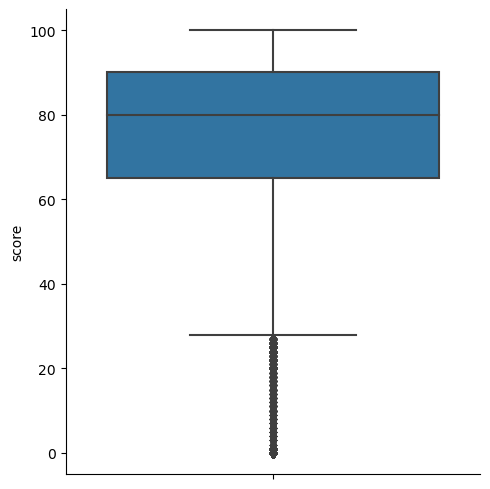

In [25]:
# we can also see here visually that all the outliers are below lower limit
sns.catplot(data=df_studentAssessment, y="score", kind="box")
plt.show()

In [26]:
df_studentInfo = pd.read_csv('studentInfo.csv')
df_studentInfo

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn


In [27]:
type_studentInfo = df_studentInfo.dtypes
type_studentInfo

code_module             object
code_presentation       object
id_student               int64
gender                  object
region                  object
highest_education       object
imd_band                object
age_band                object
num_of_prev_attempts     int64
studied_credits          int64
disability              object
final_result            object
dtype: object

In [28]:
print(df_studentInfo.describe())

         id_student  num_of_prev_attempts  studied_credits
count  3.259300e+04          32593.000000     32593.000000
mean   7.066877e+05              0.163225        79.758691
std    5.491673e+05              0.479758        41.071900
min    3.733000e+03              0.000000        30.000000
25%    5.085730e+05              0.000000        60.000000
50%    5.903100e+05              0.000000        60.000000
75%    6.444530e+05              0.000000       120.000000
max    2.716795e+06              6.000000       655.000000


In [29]:
print(df_studentInfo.isna().sum())

code_module                0
code_presentation          0
id_student                 0
gender                     0
region                     0
highest_education          0
imd_band                1111
age_band                   0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
dtype: int64


In [30]:
#removing rows with missing values - around 3%
df_studentInfo.dropna(subset = ['imd_band'], inplace = True)
df_studentInfo

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn


In [31]:
# reset indexes because I removed rows
df_studentInfo.reset_index(inplace=True)

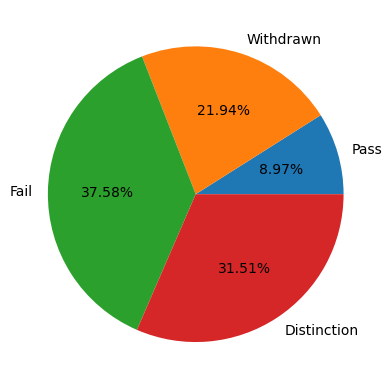

In [162]:
# How many students passed, passed with distinction, failed or withdrew
count = df_studentInfo.groupby('final_result').count().loc[:,"id_student"]
labels = df_studentInfo['final_result'].unique()
percent = (count/len(df_studentInfo))*100
# autopct to display percentages
plt.pie(percent, labels=labels, autopct='%.2f%%')
plt.show()

In [34]:
# they converted the categorical variables (Educational level and Age) into dichotomous variables
encoder = OneHotEncoder(handle_unknown="ignore")
encoder.fit(df_studentInfo[['highest_education']])
# we transform the data
df_studentInfo_tmp = encoder.transform(df_studentInfo[['highest_education']])
df_studentInfo_tmp = pd.DataFrame(df_studentInfo_tmp.toarray(), columns=encoder.get_feature_names_out(['highest_education']))
df_studentInfo_tmp

,highest_education_A Level or Equivalent,highest_education_HE Qualification,highest_education_Lower Than A Level,highest_education_No Formal quals,highest_education_Post Graduate Qualification
0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...
31477,0.0,0.0,1.0,0.0,0.0
31478,0.0,0.0,1.0,0.0,0.0
31479,1.0,0.0,0.0,0.0,0.0
31480,0.0,0.0,1.0,0.0,0.0


In [35]:
# merge (concatenate) data
df_studentInfo = pd.concat((df_studentInfo, df_studentInfo_tmp), axis=1)
df_studentInfo

,index,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,highest_education_A Level or Equivalent,highest_education_HE Qualification,highest_education_Lower Than A Level,highest_education_No Formal quals,highest_education_Post Graduate Qualification
0,0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,0.0,1.0,0.0,0.0,0.0
1,1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,0.0,1.0,0.0,0.0,0.0
2,2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,1.0,0.0,0.0,0.0,0.0
3,3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,1.0,0.0,0.0,0.0,0.0
4,4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31477,32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail,0.0,0.0,1.0,0.0,0.0
31478,32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction,0.0,0.0,1.0,0.0,0.0
31479,32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass,1.0,0.0,0.0,0.0,0.0
31480,32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn,0.0,0.0,1.0,0.0,0.0


In [36]:
encoder = OneHotEncoder(handle_unknown="ignore")
encoder.fit(df_studentInfo[['age_band']])
# we transform the data
df_studentInfo_tmp = encoder.transform(df_studentInfo[['age_band']])
df_studentInfo_tmp = pd.DataFrame(df_studentInfo_tmp.toarray(), columns=encoder.get_feature_names_out(['age_band']))
df_studentInfo_tmp

,age_band_0-35,age_band_35-55,age_band_55<=
0,0.0,0.0,1.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,1.0,0.0,0.0
...,...,...,...
31477,1.0,0.0,0.0
31478,0.0,1.0,0.0
31479,1.0,0.0,0.0
31480,0.0,1.0,0.0


In [37]:
df_studentInfo = pd.concat((df_studentInfo, df_studentInfo_tmp), axis=1)
df_studentInfo

,index,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,...,disability,final_result,highest_education_A Level or Equivalent,highest_education_HE Qualification,highest_education_Lower Than A Level,highest_education_No Formal quals,highest_education_Post Graduate Qualification,age_band_0-35,age_band_35-55,age_band_55<=
0,0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,...,N,Pass,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,...,N,Pass,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,...,Y,Withdrawn,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,...,N,Pass,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,...,N,Pass,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31477,32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,...,N,Fail,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
31478,32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,...,N,Distinction,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
31479,32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,...,Y,Pass,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
31480,32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,...,N,Withdrawn,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [38]:
# just to be sure that we don't have any nan
df_studentInfo.isna().sum()

index                                            0
code_module                                      0
code_presentation                                0
id_student                                       0
gender                                           0
region                                           0
highest_education                                0
imd_band                                         0
age_band                                         0
num_of_prev_attempts                             0
studied_credits                                  0
disability                                       0
final_result                                     0
highest_education_A Level or Equivalent          0
highest_education_HE Qualification               0
highest_education_Lower Than A Level             0
highest_education_No Formal quals                0
highest_education_Post Graduate Qualification    0
age_band_0-35                                    0
age_band_35-55                 

In [39]:
df_studentRegistration = pd.read_csv('studentRegistration.csv')
df_studentRegistration

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN
...,...,...,...,...,...
32588,GGG,2014J,2640965,-4.0,NaN
32589,GGG,2014J,2645731,-23.0,NaN
32590,GGG,2014J,2648187,-129.0,NaN
32591,GGG,2014J,2679821,-49.0,101.0


In [40]:
print(df_studentRegistration.describe())

         id_student  date_registration  date_unregistration
count  3.259300e+04       32548.000000         10072.000000
mean   7.066877e+05         -69.411300            49.757645
std    5.491673e+05          49.260522            82.460890
min    3.733000e+03        -322.000000          -365.000000
25%    5.085730e+05        -100.000000            -2.000000
50%    5.903100e+05         -57.000000            27.000000
75%    6.444530e+05         -29.000000           109.000000
max    2.716795e+06         167.000000           444.000000


In [41]:
print(df_studentRegistration.isna().sum())

code_module                0
code_presentation          0
id_student                 0
date_registration         45
date_unregistration    22521
dtype: int64


In [42]:
#replacing NaN with a median
column_to_fillna = 'date_registration'
median_value = df_studentRegistration[column_to_fillna].median()
print(median_value)
df_studentRegistration[column_to_fillna].fillna(median_value, inplace=True)
df_studentRegistration

-57.0


,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN
...,...,...,...,...,...
32588,GGG,2014J,2640965,-4.0,NaN
32589,GGG,2014J,2645731,-23.0,NaN
32590,GGG,2014J,2648187,-129.0,NaN
32591,GGG,2014J,2679821,-49.0,101.0


In [43]:
df_studentVle = pd.read_csv('studentVle.csv')
df_studentVle

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1
...,...,...,...,...,...,...
10655275,GGG,2014J,675811,896943,269,3
10655276,GGG,2014J,675578,896943,269,1
10655277,GGG,2014J,654064,896943,269,3
10655278,GGG,2014J,654064,896939,269,1


In [44]:
type_studentVle = df_studentVle.dtypes
type_studentVle

code_module          object
code_presentation    object
id_student            int64
id_site               int64
date                  int64
sum_click             int64
dtype: object

In [45]:
print(df_studentVle.describe())

         id_student       id_site          date     sum_click
count  1.065528e+07  1.065528e+07  1.065528e+07  1.065528e+07
mean   7.333336e+05  7.383234e+05  9.517400e+01  3.716946e+00
std    5.827060e+05  1.312196e+05  7.607130e+01  8.849047e+00
min    6.516000e+03  5.267210e+05 -2.500000e+01  1.000000e+00
25%    5.077430e+05  6.735190e+05  2.500000e+01  1.000000e+00
50%    5.882360e+05  7.300690e+05  8.600000e+01  2.000000e+00
75%    6.464840e+05  8.770300e+05  1.560000e+02  3.000000e+00
max    2.698588e+06  1.049562e+06  2.690000e+02  6.977000e+03


In [46]:
print(df_studentVle.isna().sum())

code_module          0
code_presentation    0
id_student           0
id_site              0
date                 0
sum_click            0
dtype: int64


In [47]:
df_vle = pd.read_csv('vle.csv')
df_vle

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN
...,...,...,...,...,...,...
6359,897063,GGG,2014J,resource,NaN,NaN
6360,897109,GGG,2014J,resource,NaN,NaN
6361,896965,GGG,2014J,oucontent,NaN,NaN
6362,897060,GGG,2014J,resource,NaN,NaN


In [48]:
type_vle = df_vle.dtypes
type_vle

id_site                int64
code_module           object
code_presentation     object
activity_type         object
week_from            float64
week_to              float64
dtype: object

In [49]:
print(df_vle.describe())

            id_site    week_from      week_to
count  6.364000e+03  1121.000000  1121.000000
mean   7.260991e+05    15.204282    15.214987
std    1.283151e+05     8.792865     8.779806
min    5.267210e+05     0.000000     0.000000
25%    6.615928e+05     8.000000     8.000000
50%    7.300965e+05    15.000000    15.000000
75%    8.140162e+05    22.000000    22.000000
max    1.077905e+06    29.000000    29.000000


In [50]:
print(df_vle.isna().sum())

id_site                 0
code_module             0
code_presentation       0
activity_type           0
week_from            5243
week_to              5243
dtype: int64


In [51]:
#delete rows with week_from or _week_to nan values
df_vle.dropna(subset = ['week_from', 'week_to'], inplace = True)
df_vle

,id_site,code_module,code_presentation,activity_type,week_from,week_to
113,546732,AAA,2013J,oucontent,2.0,2.0
198,546719,AAA,2013J,oucontent,1.0,1.0
210,546681,AAA,2013J,oucontent,1.0,1.0
264,877040,AAA,2014J,oucontent,2.0,2.0
323,877045,AAA,2014J,oucontent,1.0,1.0
...,...,...,...,...,...,...
6243,798728,GGG,2014B,resource,1.0,1.0
6266,897051,GGG,2014J,resource,2.0,2.0
6285,897121,GGG,2014J,resource,1.0,1.0
6304,897050,GGG,2014J,resource,1.0,1.0


In [164]:
# create single dataframe with the most important columns (from whitepaper)
df = df_studentInfo[['code_module', 'code_presentation', 'id_student', 'highest_education', 'age_band', 'disability', 'gender', 'num_of_prev_attempts', 'final_result']]

In [165]:
# merge df with df_studentRegistration but keep only date_registration
df_studentRegistrationSimple = df_studentRegistration[['code_module', 'code_presentation', 'id_student', 'date_registration']]
# merge will happen based on all the columns with the same name
df = pd.merge(df, df_studentRegistrationSimple)

In [166]:
df

,code_module,code_presentation,id_student,highest_education,age_band,disability,gender,num_of_prev_attempts,final_result,date_registration
0,AAA,2013J,11391,HE Qualification,55<=,N,M,0,Pass,-159.0
1,AAA,2013J,28400,HE Qualification,35-55,N,F,0,Pass,-53.0
2,AAA,2013J,30268,A Level or Equivalent,35-55,Y,F,0,Withdrawn,-92.0
3,AAA,2013J,31604,A Level or Equivalent,35-55,N,F,0,Pass,-52.0
4,AAA,2013J,32885,Lower Than A Level,0-35,N,F,0,Pass,-176.0
...,...,...,...,...,...,...,...,...,...,...
31477,GGG,2014J,2640965,Lower Than A Level,0-35,N,F,0,Fail,-4.0
31478,GGG,2014J,2645731,Lower Than A Level,35-55,N,F,0,Distinction,-23.0
31479,GGG,2014J,2648187,A Level or Equivalent,0-35,Y,F,0,Pass,-129.0
31480,GGG,2014J,2679821,Lower Than A Level,35-55,N,F,0,Withdrawn,-49.0


In [167]:
# merge df_assessments to df_studentAssessment so that I can have date of assessment for each student assessment
# date is necessary to get table of first assessments
df_studentAssessmentAll = pd.merge(df_studentAssessment, df_assessments)

In [168]:
df_studentAssessmentAll.head(5)

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight
0,1752,11391,18,0,78.0,AAA,2013J,TMA,19.0,10.0
1,1752,28400,22,0,70.0,AAA,2013J,TMA,19.0,10.0
2,1752,31604,17,0,72.0,AAA,2013J,TMA,19.0,10.0
3,1752,32885,26,0,69.0,AAA,2013J,TMA,19.0,10.0
4,1752,38053,19,0,79.0,AAA,2013J,TMA,19.0,10.0


In [169]:
# sort dateframe by date, from smallest to highest, group by student ID and course, and just get first row/assessment
df_firstAssessments = df_studentAssessmentAll.sort_values(by='date').groupby(['id_student', 'code_module', 'code_presentation']).first()

In [170]:
# reset index because we used groupby, columns became index and now we want index back to column
df_firstAssessments.reset_index(inplace=True)

In [171]:
df_firstAssessments

,id_student,code_module,code_presentation,id_assessment,date_submitted,is_banked,score,assessment_type,date,weight
0,6516,AAA,2014J,1758,17,0,60.0,TMA,19.0,10.0
1,8462,DDD,2013J,25348,29,0,93.0,TMA,25.0,10.0
2,8462,DDD,2014J,25362,-1,1,93.0,TMA,20.0,5.0
3,11391,AAA,2013J,1752,18,0,78.0,TMA,19.0,10.0
4,23629,BBB,2013B,14984,9,0,67.0,TMA,19.0,5.0
...,...,...,...,...,...,...,...,...,...,...
25815,2698257,AAA,2013J,1752,22,0,58.0,TMA,19.0,10.0
25816,2698535,CCC,2014B,24286,20,0,20.0,CMA,18.0,2.0
25817,2698535,EEE,2013J,30709,31,0,61.0,TMA,33.0,16.0
25818,2698577,BBB,2014J,15020,19,0,100.0,TMA,19.0,0.0


In [172]:
# merge with df while keeping all the rows from the df, hence how='left'
df_firstAssessmentsSimple = df_firstAssessments[['code_module', 'code_presentation', 'id_student', 'score', 'date_submitted']]
df = pd.merge(df, df_firstAssessmentsSimple, how='left')

In [173]:
# some students didn't do assessments so we have a lot of nan
df.isna().sum()

code_module                0
code_presentation          0
id_student                 0
highest_education          0
age_band                   0
disability                 0
gender                     0
num_of_prev_attempts       0
final_result               0
date_registration          0
score                   6660
date_submitted          6660
dtype: int64

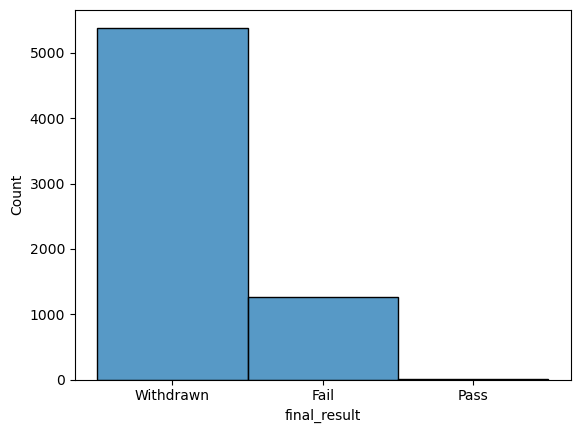

In [175]:
# check what's the final result of students that don't have score
sns.histplot(data=df[df["score"].isna()], x='final_result')
plt.show()

In [176]:
# because most of them didn't pass, replace score nan with 0
df['score'].fillna(0, inplace=True)

In [180]:
mean = df['date_submitted'].mean()
df['date_submitted'].fillna(mean, inplace=True)

In [181]:
df.isna().sum()

code_module             0
code_presentation       0
id_student              0
highest_education       0
age_band                0
disability              0
gender                  0
num_of_prev_attempts    0
final_result            0
date_registration       0
score                   0
date_submitted          0
dtype: int64

In [183]:
# merge df, only date_submitted column, because I need it to know when was the first assessment
df_studentVleSubmitted = pd.merge(df_studentVle, df[['code_module','code_presentation','id_student', 'date_submitted']])

In [184]:
# get all the clicks until the date of first assessment
df_clicksFirstAssessment = df_studentVleSubmitted[df_studentVleSubmitted['date'] <= df_studentVleSubmitted['date_submitted']]

In [185]:
df_clicksSum = df_clicksFirstAssessment.groupby(['code_module', 'code_presentation', 'id_student']).sum()

In [186]:
# Again reset index because I used groupby and want back 'code_module', 'code_presentation', 'id_student' as columns
df_clicksSum.reset_index(inplace=True)

In [187]:
df = pd.merge(df, df_clicksSum[['code_module', 'code_presentation', 'id_student', 'sum_click']], how='left')

In [188]:
df.isna().sum()

code_module                0
code_presentation          0
id_student                 0
highest_education          0
age_band                   0
disability                 0
gender                     0
num_of_prev_attempts       0
final_result               0
date_registration          0
score                      0
date_submitted             0
sum_click               3729
dtype: int64

In [189]:
# if there is no data about te clicks for students, just set to 0
df['sum_click'].fillna(0, inplace=True)

In [190]:
df

,code_module,code_presentation,id_student,highest_education,age_band,disability,gender,num_of_prev_attempts,final_result,date_registration,score,date_submitted,sum_click
0,AAA,2013J,11391,HE Qualification,55<=,N,M,0,Pass,-159.0,78.0,18.000000,401.0
1,AAA,2013J,28400,HE Qualification,35-55,N,F,0,Pass,-53.0,70.0,22.000000,512.0
2,AAA,2013J,30268,A Level or Equivalent,35-55,Y,F,0,Withdrawn,-92.0,0.0,23.845258,281.0
3,AAA,2013J,31604,A Level or Equivalent,35-55,N,F,0,Pass,-52.0,72.0,17.000000,395.0
4,AAA,2013J,32885,Lower Than A Level,0-35,N,F,0,Pass,-176.0,69.0,26.000000,567.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31477,GGG,2014J,2640965,Lower Than A Level,0-35,N,F,0,Fail,-4.0,0.0,23.845258,41.0
31478,GGG,2014J,2645731,Lower Than A Level,35-55,N,F,0,Distinction,-23.0,80.0,68.000000,80.0
31479,GGG,2014J,2648187,A Level or Equivalent,0-35,Y,F,0,Pass,-129.0,65.0,50.000000,34.0
31480,GGG,2014J,2679821,Lower Than A Level,35-55,N,F,0,Withdrawn,-49.0,83.0,56.000000,184.0


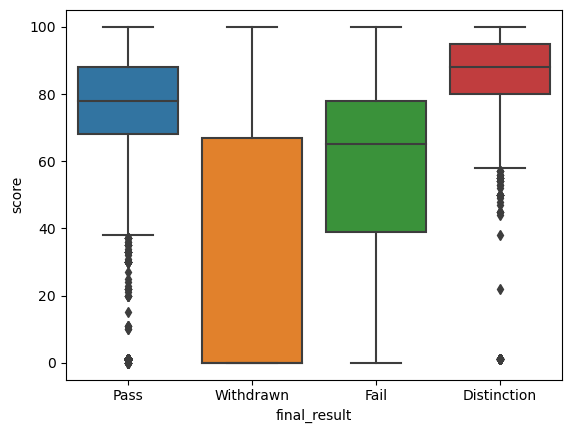

In [191]:
sns.boxplot(x='final_result', y='score', data=df)
plt.show()

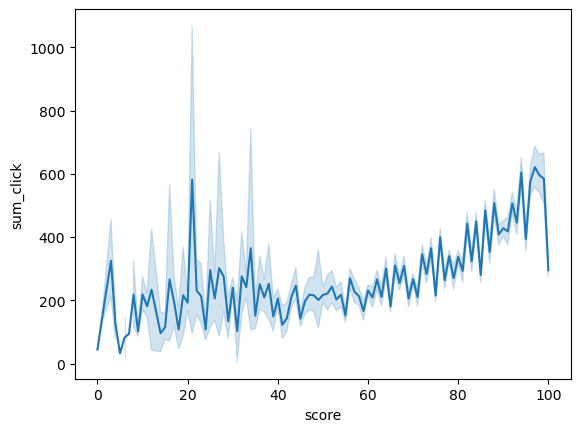

In [139]:
# the higher the score, the more student clicked prior to the assessment
# tick at 0 is because I replaced all nan values with 0
sns.lineplot(x='score', y='sum_click', data=df)
plt.show()

In [140]:
df['num_of_prev_attempts'].unique()

array([0, 1, 2, 4, 3, 5, 6], dtype=int64)

<Axes: xlabel='num_of_prev_attempts', ylabel='Count'>

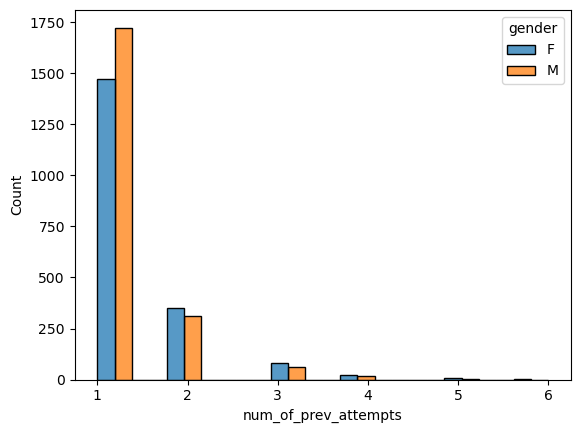

In [145]:
# ignore rows where num_of_prev_attempts is 0
# There are more males that fail once but there are more females that fail more than once
sns.histplot(data=df[df['num_of_prev_attempts'] > 0], x='num_of_prev_attempts', hue='gender', multiple='dodge')

In [147]:
# but there are more males signed in
df.groupby('gender')['id_student'].count()

gender
F    14415
M    17067
Name: id_student, dtype: int64

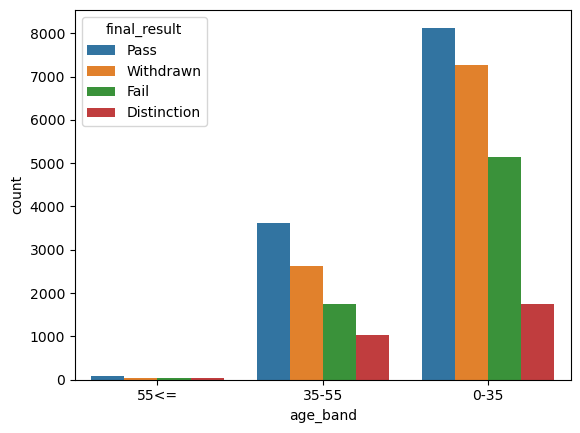

In [152]:
sns.countplot(x='age_band', hue='final_result', data=df)
plt.show()